In [303]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [304]:
temp_1 = np.array([25.12, 27.01, 29.01, 31.00, 33.00, 35.01, 37.00, 39.00, 40.00])
temp_2 = np.array([25.00, 28.00, 31.00, 34.00, 37.01])
temp_dev_1 = 1/(temp_1 + 273)
temp_dev_2 = 1/(temp_2 + 273)
temp_1, temp_2, temp_dev_1, temp_dev_2

(array([25.12, 27.01, 29.01, 31.  , 33.  , 35.01, 37.  , 39.  , 40.  ]),
 array([25.  , 28.  , 31.  , 34.  , 37.01]),
 array([0.00335435, 0.00333322, 0.00331115, 0.00328947, 0.00326797,
        0.00324665, 0.00322581, 0.00320513, 0.00319489]),
 array([0.0033557 , 0.00332226, 0.00328947, 0.00325733, 0.0032257 ]))

In [305]:
height_1 = np.array([57.79, 63.89, 71.55, 81.20, 90.39, 100.21, 112.62, 124.57, 130.25])
height_2 = np.array([58.50, 68.25, 79.34, 93.41, 109.06])

press_1 = 133.32 * height_1
press_2 = 133.32 * height_2

ln_press_1 = np.log(press_1)
ln_press_2 = np.log(press_2)

press_1, press_2, ln_press_1, ln_press_2

(array([ 7704.5628,  8517.8148,  9539.046 , 10825.584 , 12050.7948,
        13359.9972, 15014.4984, 16607.6724, 17364.93  ]),
 array([ 7799.22  ,  9099.09  , 10577.6088, 12453.4212, 14539.8792]),
 array([8.949568  , 9.04991511, 9.16314876, 9.2896675 , 9.3968859 ,
        9.50002024, 9.61677157, 9.71762006, 9.76220793]),
 array([8.96177901, 9.11592969, 9.26649467, 9.42975066, 9.58465044]))

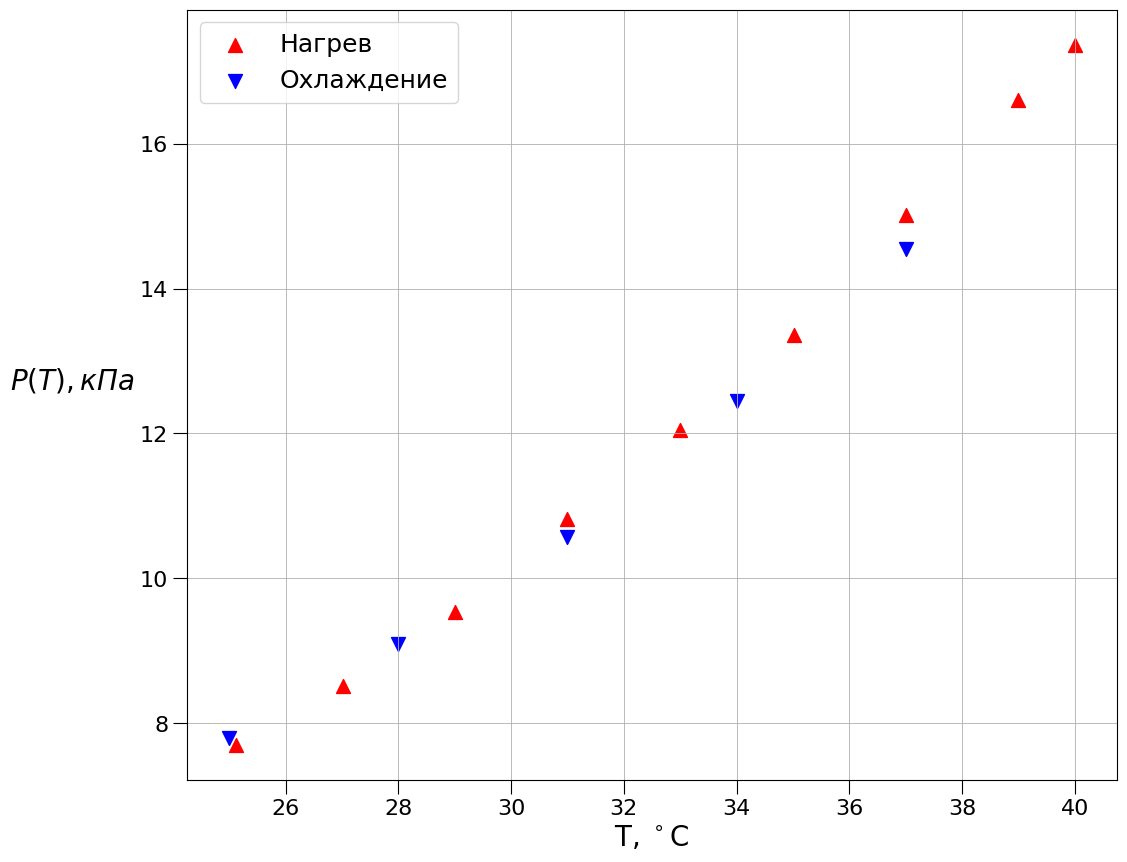

In [306]:
plot_4 = plt.figure(figsize=(12,10))
plt.grid(visible=True, linewidth=0.6)

z = np.polyfit(temp_1, press_1, 1)
p = np.poly1d(z)
# plt.plot(temp_1, p(temp_1),"r--", linewidth=1)


plt.scatter(temp_1, press_1 / 1000, marker="^", s=100, c='red', label = 'Нагрев')
plt.scatter(temp_2, press_2 / 1000, marker="v", s=100, c='blue', label = 'Охлаждение')
#plt.title('Зависимость $q = q(T)$', fontsize=18)
#plt.ylim(ymin=100, ymax=120)
plt.ylabel('$P(T), кПа$', fontsize=20, rotation=0, ha='right')
plt.xlabel('T, $^\circ$C', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16, size=10)
plt.grid(visible=True, linewidth=0.6)

plt.legend(fontsize=18)
plt.show()

plot_4.savefig("PT.pdf", format="pdf")

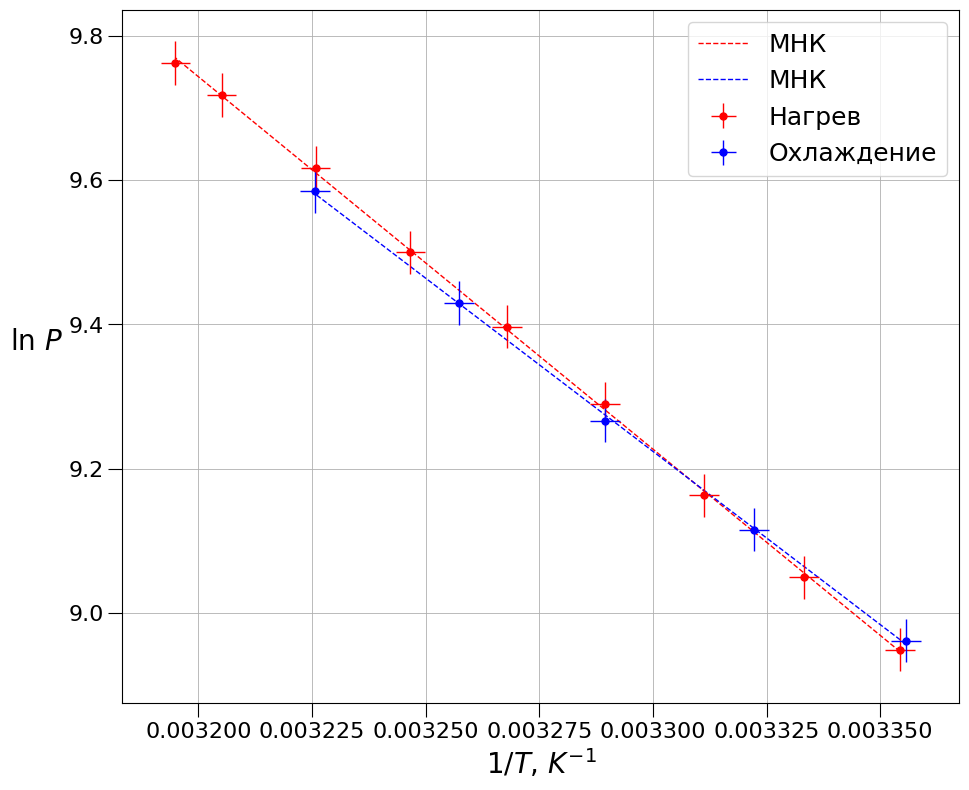

In [307]:
plot_5 = plt.figure(figsize=(12*0.9,10*0.9))
plt.grid(visible=True, linewidth=0.6)
yerr_1 = np.ones(9) * 0.03
yerr_2 = np.ones(5) * 0.03
xerr_1 = temp_dev_1 * 0.001
xerr_2 = temp_dev_2 * 0.001

z = np.polyfit(temp_dev_1, ln_press_1, deg=1)
polynom = np.poly1d(z)
plt.plot(temp_dev_1, polynom(temp_dev_1),"r--", linewidth=1, label="МНК")

z, err = np.polyfit(temp_dev_2, ln_press_2, deg=1, cov=True)
polynom = np.poly1d(z)
plt.plot(temp_dev_2, polynom(temp_dev_2),"b--", linewidth=1, label="МНК")

plt.errorbar(temp_dev_1, ln_press_1, fmt='r.', linewidth=0, xerr=xerr_1, yerr=yerr_1, markersize=10, elinewidth=1, label='Нагрев') #, marker="^", s=100, c='red', label = 'Нагрев'
plt.errorbar(temp_dev_2, ln_press_2, fmt='b.', linewidth=0, xerr=xerr_2, yerr=yerr_2, markersize=10, elinewidth=1, label='Охлаждение') #, marker="v", s=100, c='blue', label = 'Охлаждение'
#plt.title('Зависимость $q = q(T)$', fontsize=18)
#plt.ylim(ymin=100, ymax=120)
plt.ylabel('ln $P$', fontsize=20, rotation=0, ha='right')
plt.xlabel('$1/T$, $K^{-1}$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16, size=10)
plt.grid(visible=True, linewidth=0.6)

plt.legend(fontsize=18)
plt.show()

plot_5.savefig('lnPT.pdf', format='pdf')

In [308]:
z = np.polyfit(temp_dev_2, ln_press_2, deg=1)
zz = np.polyfit(temp_dev_1, ln_press_1, deg=1)
z, zz

(array([-4798.60395585,    25.05957793]),
 array([-5159.73564429,    26.25442483]))

In [309]:
#Least Squared Error
x = temp_dev_1
y = ln_press_1
n = len(temp_dev_1)
k = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x * x) - np.mean(x) ** 2)
error = 1 / np.sqrt(n) * np.sqrt(((np.mean(y * y)) - np.mean(y) ** 2) / (np.mean(x * x) - np.mean(x) ** 2) )
-k, error / 46

(5159.7356442919445, 37.39701770267093)

In [310]:
#Least Squared Error
x = temp_dev_2
y = ln_press_2
n = len(temp_dev_2)
k = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x * x) - np.mean(x) ** 2)
error = 1 / np.sqrt(n) * np.sqrt(((np.mean(y * y)) - np.mean(y) ** 2) / (np.mean(x * x) - np.mean(x) ** 2))
-k, error / 46

(4798.603955857003, 46.6627001200717)